In [24]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML
%matplotlib inline

<img src="astropy_banner_96.png"/>

# AstroPy: Basic Astronomy tools in Python
Karl Kosack (SAp, LEPCHE)

## What is AstroPy?

WebSite and Documentation : http://www.astropy.org

Previously there were a number of astronomy-realted packages that were scattered throughout the Python world. Generally each had a specific use, and they were not interoperable. 

<span style="color: darkcyan">Recently, AstroPy changed all that! now there is a **central package with all astronomy-related modules**! It collects the best of what was available, and provides a unified interface. </span>

In [25]:
HTML('<iframe src="http://docs.astropy.org/en/stable/" width=800 height=500></iframe>')

###What we will cover:

* Units and Constants
* Coordinates Systems
    * spatial 
    * time
* Astronomical Table Access
* Astronomical Image Access

## Units and Constants

Very useful when doing computations in Python! Units are **convertable**, **combinable**,  and **propegate automatically**!

In [26]:
from astropy import units as u

Defining a quanity that has a unit:

In [27]:
d = 12.3 * u.kpc
M = np.linspace( 50,60,10 ) * u.kg

print d
print M

12.3 kpc
[ 50.          51.11111111  52.22222222  53.33333333  54.44444444
  55.55555556  56.66666667  57.77777778  58.88888889  60.        ] kg


Note that units are associated with a scalar or an NDArray, and are thus efficient (only one per n-dimensional vector)

Now let's see the power of units:

### Simple Unit Conversion

In [28]:
print d.to( u.m )
print d.to( u.Angstrom )
print d.to( u.imperial.foot )
print d.to( u.lightyear )

# can also use a string representation:
print d.to( "m" )

3.7953834252e+20 m
3.7953834252e+30 Angstrom
1.24520453583e+21 ft
40117.2344588 lyr
3.7953834252e+20 m


In [29]:
print d.to( u.kg )   # this fails of course! 

UnitsError: 'kpc' (length) and 'kg' (mass) are not convertible

Getting at the value directly: use the ``value`` property (useful if you need to pass something that has units into a function that doesn't understand units, like for plotting)

In [30]:
print "Distance in feet=", d.to( u.imperial.foot).value   #strips off any units

Distance in feet= 1.24520453583e+21


### Composing units

In [31]:
dNdE = 1e-10 * u.TeV/u.cm**2/u.s
print dNdE

1e-10 TeV / (cm2 s)


In [32]:
dNdE   # the IPython Notebook knows how to do it in a nicer way! 

<Quantity 1e-10 TeV / (cm2 s)>

You can even convert between complex units:

In [33]:
print dNdE.to( u.erg/u.m**2 * u.Hz)
print dNdE.to( "erg cm^-2 s^-1")

1.602176565e-06 erg Hz / m2
1.602176565e-10 erg / (cm2 s)


get the unit string in LaTeX:

In [34]:
print dNdE.unit.to_string(format='latex')
dNdE.unit   # in notebook, automatically will "pretty print"

$\mathrm{\frac{TeV}{s\,cm^{2}}}$


Unit("TeV / (cm2 s)")

Lots of astonomy-compatible string representations!

In [35]:
print dNdE.unit.to_string( format='vounit' )  #virtual-observatory complient
print dNdE.unit.to_string( format='fits' )    # FITS complient
print dNdE.unit.to_string( format='cds' )     #CDS Strasbourg table complient
print dNdE.unit.to_string( format='console' ) # console pretty-print

cm-2 s-1 TeV
cm-2 s-1 TeV
TeV.s-1.cm-2
  TeV  
 ------
 s cm^2


#### Other interesting things you can do:

In [36]:
print dNdE.cgs
print dNdE.si
print u.Newton.decompose()

1.602176565e-10 g / s3
1.602176565e-13 kg / s3
kg m / s2


In [37]:
u.kg.find_equivalent_units()

  Primary name | Unit definition | Aliases    
[
  M_e          | 9.10938e-31 kg  |             ,
  M_p          | 1.67262e-27 kg  |             ,
  g            | 0.001 kg        | gram        ,
  kg           | irreducible     | kilogram    ,
  solMass      | 1.9891e+30 kg   | M_sun, Msun ,
  t            | 1000 kg         | tonne       ,
  u            | 1.66054e-27 kg  | Da, Dalton  ,
]

In [38]:
# How much do I weigh in Solar Masses?
(85*u.kg).to( u.M_sun )

<Quantity 4.273289427379217e-29 solMass>

There are also many **CONSTANTS** that are defined in ``astropy.constants``.  Constants are  Quantities that have units units, and also have some extra metadata (a bibliographical reference, and error)

In [39]:
from astropy import constants

In [40]:
print  constants.M_sun

  Name   = Solar mass
  Value  = 1.9891e+30
  Error  = 5e+25
  Units  = kg
  Reference = Allen's Astrophysical Quantities 4th Ed.


In [41]:
print constants.R_jup

  Name   = Jupiter equatorial radius
  Value  = 71492000.0
  Error  = 500.0
  Units  = m
  Reference = Allen's Astrophysical Quantities 4th Ed.


In [42]:
print "Jupiter's radius is",constants.R_jup.to( u.km )
print "Jupiter is",constants.R_jup/constants.R_earth," x the radius of earth"

Jupiter's radius is 71492.0 km
Jupiter is 11.2089174643  x the radius of earth


### Advanced unit conversion:

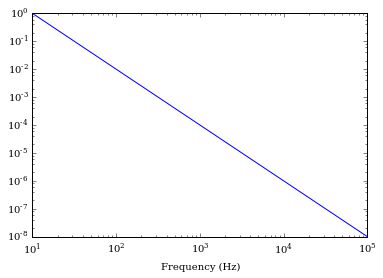

In [43]:
nu = np.logspace(1,5,100) * u.Hz
Y = 100*(nu/1*u.Hz)**(-2.0)

plt.loglog( nu.value, Y.value)
plt.xlabel("Frequency (Hz)")

Let's convert this now from frequency (Hz) to energy (erg)! 

In [44]:
E = nu.to( u.erg )

UnitsError: 'Hz' (frequency) and 'erg' (energy) are not convertible

Of course, that fails, since there is a factor of planck's constant that we need to apply... We could do it using astropy.constants.h, but there's an even better way: **units can have some physics knowledge!**.  This is expressed by giving an *equivalencies* option:

In [ ]:
E = nu.to( u.eV, equivalencies=u.spectral() )
print E.unit

In [ ]:
plt.loglog( E.value, Y.value )
plt.xlabel( "eV" )

In [ ]:
print dir(u.equivalencies)


-----------------------------------------

## Coordinates and Times
Some common task in astronomy are:
* convert positions between spatial coordinate systems
* lookup the coordinates of an object by name
* work with times, and convert them between time representations

In [45]:
from astropy import coordinates as c
from astropy import time as t

First, let's get a coordinate object and play with it! (let's start with the cool stuff:)

In [46]:
crabpos = c.SkyCoord.from_name( "Crab Nebula" ) 
print crabpos
print "--------"
print crabpos.ra
print crabpos.ra.deg
print crabpos.ra.hour

<SkyCoord (ICRS): (ra, dec) in deg
    (83.633083, 22.0145)>
--------
83d37m59.0988s
83.633083
5.57553886667


Some cool features of SkyCoords:

In [47]:
etacarpos = c.SkyCoord.from_name("Eta Car")
print "Distance from Eta Car to the Crab is: ", etacarpos.separation( crabpos )

Distance from Eta Car to the Crab is:  102d54m21.1838s


In [48]:
print c.SkyCoord("12h16m35s", "-10d45m19s") #other string formats are automaticaly understood

# or we can use values directly:
pos1 = c.SkyCoord( 10*u.hour, -20*u.deg )   
print pos1

# let's make one in another frame (default was ICRS, but let's use FK4, i.e. "B1950")
pos2 = c.SkyCoord( 10*u.hour, -20*u.deg, frame=c.FK4)
print pos2

<SkyCoord (ICRS): (ra, dec) in deg
    (184.14583333, -10.75527778)>
<SkyCoord (ICRS): (ra, dec) in deg
    (150.0, -20.0)>
<SkyCoord (FK4: equinox=B1950.000, obstime=B1950.000): (ra, dec) in deg
    (150.0, -20.0)>


In [49]:
# note that RA/Dec expressed ICRS and FK4 are not the same! 
# What is the angualr distance between our two coordinates?
pos1.separation(pos2)

<Angle 0.6045174601501253 deg>

In [50]:
print "sep in deg:", pos1.separation(pos2).deg
print "sep in rad:", pos1.separation(pos2).rad

sep in deg: 0.60451746015
sep in rad: 0.0105508200654


Let's do some conversion: just use the appriate property:
* icrs
* fk5
* fk4
* galactic
* galactocentric
* altaz (see later...)

In [51]:
print "ICRS:", pos1.icrs
print "GALACTIC:", pos1.galactic  # common helper attribute
print "GALACTIC:", pos1.transform_to( c.Galactic )  # more general: transform to a frame
print ""
print ""
print  "The Crab Nebula is {0:.1f} deg off-plane"\
    .format(crabpos.galactic.b.deg)

ICRS: <SkyCoord (ICRS): (ra, dec) in deg
    (150.0, -20.0)>
GALACTIC: <SkyCoord (Galactic): (l, b) in deg
    (256.9890682, 27.19907741)>
GALACTIC: <SkyCoord (Galactic): (l, b) in deg
    (256.9890682, 27.19907741)>


The Crab Nebula is -5.8 deg off-plane


###More complex conversion: go from RA/Dec to Alt/Az! 

In [52]:
crab = c.SkyCoord.from_name("Crab Nebula")

# need to know two pieces of info: Location on Earth + time!
paris = c.EarthLocation( lat=48.8567*u.deg, lon=2.3508*u.deg )
print paris

now = t.Time.now()  # gets the current time
print now

crab_altaz = crab.transform_to( c.AltAz(obstime=now, location=paris) )

print "CRAB IS AT ELEVATION: {0:.3f} deg , AZIMUTH: {1:.3f} deg"\
    .format( crab_altaz.alt.deg, crab_altaz.az.deg)

If you need enough precision such that this matters (~<10 arcsec), you can download the latest IERS predictions by doing:
from astropy.utils.data import download_file
from astropy.utils import iers
iers.IERS.iers_table = iers.IERS_A.open(download_file(iers.IERS_A_URL, cache=True)) [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can download the latest IERS predictions by doing:
from astropy.utils.data import download_file
from astropy.utils import iers
iers.IERS.iers_table = iers.IERS_A.open(download_file(iers.IERS_A_URL, cache=True))
If you need enough precision such that this matters (~<10 arcsec), you can download the latest IERS predictions by doing:
from astropy.utils.data import download_file
from astropy.utils import iers
iers.IERS.iers_table = iers.IERS_A.open(download_file(iers.IERS_A_URL, cache=True)) [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), y

(4200910.643257838, 172456.78503911156, 4780088.658775934) m
2015-05-05 11:33:45.642119
CRAB IS AT ELEVATION: 45.506 deg , AZIMUTH: 110.600 deg


> NOTE: you can even give an atmospheric pressure to the AltAz frame to get even more accuracy with refraction corrections!

### Time Conversion
Times are similar to SkyCoordinates, so we won't go into as much detail.  


In [53]:
obs = t.Time( "2015-10-11 15:17:45.3", format="iso", scale="utc")
print obs
print obs.mjd  # Modified Julian Day
print obs.gps  # GPS time
print obs.unix # UNIX timestamp
print obs.iso  # ISO string
print obs.isot # ISO string with T
print obs.tt   # Terrestrial Time
print obs.tai  # International atomic time
print obs.datetime # python datetime object
# etc...

2015-10-11 15:17:45.300
57306.6373299
1128611881.3
1444576665.3
2015-10-11 15:17:45.300
2015-10-11T15:17:45.300
2015-10-11 15:18:52.484
2015-10-11 15:18:20.300
2015-10-11 15:17:45.300000


How about differences?

In [54]:
t0 = t.Time( "2000-01-01" ) # defaults to ISO UTC
t1 = t.Time.now()

diff = t1-t0
diff

<TimeDelta object: scale='tai' format='jd' value=5603.4818394>

In [55]:
print "time since {0} is {1} seconds".format( t0, diff.sec)

time since 2000-01-01 00:00:00.000 is 484140830.925 seconds


In [56]:
# Generally it's good to work with vectors of times, since it's faster.
# let's make a time vector and add some times

t0 = t.Time('1999-01-01T00:00:00.123456789')
dt = t.TimeDelta( 1*u.day )
deltas = dt * np.linspace(0.,1.,12)

times = t0 + deltas
print times.iso

['1999-01-01 00:00:00.123' '1999-01-01 02:10:54.669'
 '1999-01-01 04:21:49.214' '1999-01-01 06:32:43.760'
 '1999-01-01 08:43:38.305' '1999-01-01 10:54:32.851'
 '1999-01-01 13:05:27.396' '1999-01-01 15:16:21.942'
 '1999-01-01 17:27:16.487' '1999-01-01 19:38:11.033'
 '1999-01-01 21:49:05.578' '1999-01-02 00:00:00.123']


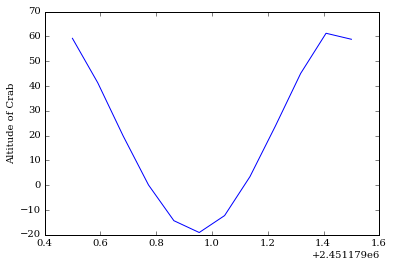

In [57]:
t0 = t.Time('1999-01-01T00:00:00.123456789')
dt = t.TimeDelta( 1*u.minute )
deltas = dt * np.linspace(0.,5000,100)

crab_altaz = crab.transform_to( c.AltAz(obstime=times, location=paris) )

plt.plot( times.jd, crab_altaz.alt )
plt.ylabel("Altitude of Crab")



-----------------------------------

## Table Access

One of the most powerful tools in AstroPy is the table access library.  It allows one to work with tables in many different formats with ease! You don't even normally have to care what the format is.

### reading tables

In [58]:
from astropy import table

# let's open an existing FITS table:

atnf = table.Table.read( "atnf_PSR_07.fits" )


In [59]:
atnf

SOURCE_ID,DAY_ID,CLASS,NAME,RA_OBJ,DEC_OBJ,L_OBJ,B_OBJ,D_OBJ,AGE_OBJ,BSURF,EDOT,EDOTD2
,d,,,deg,deg,deg,deg,kpc,yr,G,erg / s,erg / (kpc2 s)
string144,float64,int16,string80,float32,float32,float32,float32,float32,float32,float32,float32,float32
J000604.1+183515.1,0.0,3200,J0006+1834,1.51714,18.5875,108.17,-42.98,0.7,5.24e+06,1.22e+12,2.5e+32,5.1e+32
J001418.6+474639.2,0.0,3200,J0014+4746,3.57754,47.7775,116.5,-14.63,1.82,3.48e+07,8.47e+11,1.2e+31,3.5e+30
J002352.0-720440.6,0.0,3200,J0024-7204,5.96657,-72.0779,305.92,-44.89,4.9,0.0,0.0,0.0,0.0
J002413.8-720455.9,0.0,3200,J0024-7204,6.05765,-72.0822,305.88,-44.89,4.9,0.0,0.0,0.0,0.0
J002412.7-720531.5,0.0,3200,J0024-7204,6.05281,-72.0921,305.88,-44.88,4.9,5.69e+08,5.97e+08,8.8e+34,3.7e+33
J002402.9-720448.3,0.0,3200,J0024-7204,6.01214,-72.0801,305.9,-44.89,4.9,6.44e+08,4.16e+08,1.4e+35,5.9e+33
J002408.4-720452.1,0.0,3200,J0024-7204,6.03486,-72.0811,305.89,-44.89,4.9,0.0,0.0,0.0,0.0
J002404.1-720412.7,0.0,3200,J0024-7204,6.017,-72.0702,305.9,-44.9,4.9,0.0,0.0,0.0,0.0


In [60]:
print "COLUMNS:",atnf.colnames
print ""
print "HEADERS:"
for key in atnf.meta:   # headers are key=value in an OrderedDict
    print "    -> ",key,"=",atnf.meta[key]

COLUMNS: ['SOURCE_ID', 'DAY_ID', 'CLASS', 'NAME', 'RA_OBJ', 'DEC_OBJ', 'L_OBJ', 'B_OBJ', 'D_OBJ', 'AGE_OBJ', 'BSURF', 'EDOT', 'EDOTD2']

HEADERS:
    ->  DATE = Tue Feb 19 14:49:49 2008
    ->  EXTNAME = ATNF-CAT
    ->  ORIGIN = MPI-K
    ->  CREATOR = read_atnf_PSR_07.pro (IDL)
    ->  MJDREF = 51544
    ->  RESPONSI = mrenaud@mpi-hd.mpg.de


In [61]:
atnf['NAME']

J0006+1834
J0014+4746
J0024-7204
J0024-7204
J0024-7204
J0024-7204
J0024-7204
J0024-7204
J0024-7204
J0024-7204
J0024-7204


In [62]:
# make a smaller table from this table, with only the cols you want:
small = atnf['NAME','RA_OBJ','DEC_OBJ']
small

NAME,RA_OBJ,DEC_OBJ
,deg,deg
string80,float32,float32
J0006+1834,1.51714,18.5875
J0014+4746,3.57754,47.7775
J0024-7204,5.96657,-72.0779
J0024-7204,6.05765,-72.0822
J0024-7204,6.05281,-72.0921
J0024-7204,6.01214,-72.0801
J0024-7204,6.03486,-72.0811
J0024-7204,6.017,-72.0702


The display in the Notebook is nice, but we can also do it fancier:

In [63]:
atnf.show_in_browser( jsviewer=True )

> Note that it is just concidence that we loaded a FITS table. We will see later we can load   >  tables in nearly any format! ASCII (multiple formats), HDF5, HTML, LATEX, etc. Even very  >astro-specific formats like **ascii.sextractor**.

###Tables and Columns act like NumPy NDArrays! 

In [64]:
print atnf['EDOTD2'][10:15] # just entries 10 to 15
print atnf[10:15]# just entries 10 to 15

    EDOTD2    
erg / (kpc2 s)
--------------
           0.0
           0.0
           0.0
       2.7e+33
           0.0
    SOURCE_ID      DAY_ID CLASS    NAME    ...  BSURF     EDOT      EDOTD2    
                     d                     ...    G     erg / s erg / (kpc2 s)
------------------ ------ ----- ---------- ... -------- ------- --------------
J002402.9-720448.3    0.0  3200 J0024-7204 ...      0.0     0.0            0.0
J002356.3-720520.0    0.0  3200 J0024-7204 ...      0.0     0.0            0.0
J002409.5-720416.4    0.0  3200 J0024-7204 ...      0.0     0.0            0.0
J002402.9-720448.3    0.0  3200 J0024-7204 ... 2.87e+08 6.5e+34        2.7e+33
J002404.1-720412.7    0.0  3200 J0024-7204 ...      0.0     0.0            0.0


In [65]:
# you can even get at just the data exactly as NumPy array:
atnf['EDOTD2'].data

array([  5.10000000e+32,   3.50000013e+30,   0.00000000e+00, ...,
         9.99999979e+33,   8.49999975e+30,   6.90000021e+31], dtype=float32)

so you can use the same slicing features of NumPy to make selections of your data!

In [66]:
# find just the sources that have a spin-down flux above 1e36:
selected = atnf[ atnf['EDOTD2'] > 1e36 ]
selected

SOURCE_ID,DAY_ID,CLASS,NAME,RA_OBJ,DEC_OBJ,L_OBJ,B_OBJ,D_OBJ,AGE_OBJ,BSURF,EDOT,EDOTD2
,d,,,deg,deg,deg,deg,kpc,yr,G,erg / s,erg / (kpc2 s)
string144,float64,int16,string80,float32,float32,float32,float32,float32,float32,float32,float32,float32
J020537.6+644926.4,0.0,3200,J0205+6449,31.4067,64.824,130.72,3.08,3.2,5370.0,3.61e+12,2.7e+37,2.6e+36
J053433.2+220052.9,0.0,3200,J0534+2200,83.6385,22.0147,184.56,-5.78,2.0,1240.0,3.78e+12,inf,1.2e+38
J063354.7+174632.0,0.0,3200,J0633+1746,98.4777,17.7756,195.13,4.27,0.16,342000.0,1.63e+12,3.2e+34,1.3e+36
J083519.5-451035.4,0.0,3200,J0835-4510,128.831,-45.1765,263.55,-2.79,0.29,11300.0,3.38e+12,6.9e+36,8.5e+37
J183334.5-103416.9,0.0,3200,J1833-1034,278.394,-10.5714,21.5,-0.89,4.3,4850.0,3.58e+12,3.4e+37,1.8e+36


In [67]:
print "The following {0} are very powerful pulsars!".format( len(selected) )
print selected['NAME']

The following 5 are very powerful pulsars!
   NAME   
----------
J0205+6449
J0534+2200
J0633+1746
J0835-4510
J1833-1034


### writing tables
Let's now write the selected pulsars to **another FITS file**!

In [68]:
selected.write("selected.fits")
#that's it!

#DEMO: open that fits file in a terminal...

But that's not all: we have **many formats** to choose from:

http://docs.astropy.org/en/stable/io/unified.html#built-in-table-readers-writers


In [69]:
selected.write("selected.tex", format="latex") # publication ready!
selected.write("snrs.h5", "/SNRs", format="hdf5") # some need extra arguments

! cat selected.tex


\begin{table}
\begin{tabular}{ccccccccccccc}
SOURCE_ID & DAY_ID & CLASS & NAME & RA_OBJ & DEC_OBJ & L_OBJ & B_OBJ & D_OBJ & AGE_OBJ & BSURF & EDOT & EDOTD2 \\
 & $\mathrm{d}$ &  &  & $\mathrm{{}^{\circ}}$ & $\mathrm{{}^{\circ}}$ & $\mathrm{{}^{\circ}}$ & $\mathrm{{}^{\circ}}$ & $\mathrm{kpc}$ & $\mathrm{yr}$ & $\mathrm{G}$ & $\mathrm{erg\,s^{-1}}$ & $\mathrm{erg\,s^{-1}\,kpc^{-2}}$ \\
J020537.6+644926.4 & 0.0 & 3200 & J0205+6449 & 31.4067 & 64.824 & 130.72 & 3.08 & 3.2 & 5370.0 & 3.61e+12 & 2.7e+37 & 2.6e+36 \\
J053433.2+220052.9 & 0.0 & 3200 & J0534+2200 & 83.6385 & 22.0147 & 184.56 & -5.78 & 2.0 & 1240.0 & 3.78e+12 & inf & 1.2e+38 \\
J063354.7+174632.0 & 0.0 & 3200 & J0633+1746 & 98.4777 & 17.7756 & 195.13 & 4.27 & 0.16 & 342000.0 & 1.63e+12 & 3.2e+34 & 1.3e+36 \\
J083519.5-451035.4 & 0.0 & 3200 & J0835-4510 & 128.831 & -45.1765 & 263.55 & -2.79 & 0.29 & 11300.0 & 3.38e+12 & 6.9e+36 & 8.5e+37 \\
J183334.5-103416.9 & 0.0 & 3200 & J1833-1034 & 278.394 & -10.5714 & 21.5 & -0.89 & 4.3 & 

note that you can **read tables from URLs** too:
    

In [70]:
snrs = table.Table.read("ftp://cdsarc.u-strasbg.fr/pub/cats/VII/253/snrs.dat",
                         readme="ftp://cdsarc.u-strasbg.fr/pub/cats/VII/253/ReadMe",
                         format="ascii.cds")

print "COLS: ",snrs.colnames
snrs[:5]

COLS:  ['SNR', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'MajDiam', '---', 'MinDiam', 'u_MinDiam', 'type', 'l_S(1GHz)', 'S(1GHz)', 'u_S(1GHz)', 'Sp-Index', 'u_Sp-Index', 'Names']


SNR,RAh,RAm,RAs,DE-,DEd,DEm,MajDiam,---,MinDiam,u_MinDiam,type,l_S(1GHz),S(1GHz),u_S(1GHz),Sp-Index,u_Sp-Index,Names
,h,min,s,,deg,arcmin,arcmin,,arcmin,,,,Jy,,,,
string88,int64,int64,int64,string8,int64,int64,float64,string8,float64,string8,string16,string8,float64,string8,float64,string8,string208
G000.0+00.0,17,45,44,-,29,0,3.5,x,2.5,--,S,--,100.0,?,0.8,?,Sgr A East
G000.3+00.0,17,46,15,-,28,38,15.0,x,8.0,--,S,--,22.0,--,0.6,--,--
G000.9+00.1,17,47,21,-,28,9,8.0,--,--,--,C,--,18.0,?,--,v,--
G001.0-00.1,17,48,30,-,28,9,8.0,--,--,--,S,--,15.0,--,0.6,?,--
G001.4-00.1,17,49,39,-,27,46,10.0,--,--,--,S,--,2.0,?,--,?,--


### Making a table from scratch 

We don't always want to load a table to work with it.. SOmetimes we want to generate some data and write it to a table

In [71]:
a = [1, 4, 5]
b = [2.0, 5.0, 8.2]
c = ['x', 'y', 'z']
t = table.Table([a, b, c], names=('a', 'b', 'c'), meta={'name': 'first table'})
print t
t.meta  # header keywords

 a   b   c 
--- --- ---
  1 2.0   x
  4 5.0   y
  5 8.2   z


{'name': 'first table'}

In [72]:
table.Table?

### Cool stuff: that I don't have time to show you
* joining tables
* fancy masking tables
* stacking tables



---------------------------


## FITS Image access

Ok, we can access FITS tables (and other kinds as well), but what about FITS images and datacubes?  For taht we need to go to the lower-level fits interface.  

SOme of you make have used ``pyfits`` in the past. Development been moved ``astropy.io.fits`` (pyfits is not longer supported)

In [73]:
from astropy.io import fits


In [74]:
fitsfile = fits.open("vela_2.0-8.0_flux.fits")

fitsfile.info()


Filename: vela_2.0-8.0_flux.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     189   (588, 472)   float64   


In [75]:
image = fitsfile[0] # first HDU (there's only one in this file, but may be more)

In [76]:
image.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  588 / length of data axis                            
NAXIS2  =                  472 / length of data axis                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'vela_2.0-8.0_flux.fits' / ASCDM block name                           
ASOLFILE= 'pcadf399999303N003_asol1.fits'                                       
THRFILE = 'acisD2005-07-01evtspltN0002.fits'                                    
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'dmimgcalc - Versi

get a header keyword:

In [77]:
print image.header['MJD_OBS']

55021.5833979


In [78]:
image.data

array([[  3.57891936e-09,   8.34289603e-10,   0.00000000e+00, ...,
          0.00000000e+00,   1.13029266e-08,   1.66015553e-08],
       [  0.00000000e+00,   9.58613079e-09,   6.73792224e-09, ...,
          7.05635584e-09,   2.39556844e-09,   4.19313275e-10],
       [  3.72970966e-09,   7.14046017e-09,   6.35789505e-09, ...,
          8.96702983e-09,   4.60270655e-09,   4.86753610e-09],
       ..., 
       [  1.13655557e-09,   3.81179035e-09,   3.45669998e-09, ...,
          0.00000000e+00,   1.00146203e-09,   1.23558768e-08],
       [  0.00000000e+00,   2.70082504e-09,   1.06594018e-09, ...,
          4.79216329e-09,   2.36669205e-09,   7.71180067e-09],
       [  4.77691706e-09,   8.34896416e-09,   6.02902179e-09, ...,
          5.10113207e-09,   2.29898113e-09,   0.00000000e+00]])

It's just a **NumPy** ``NDArray`` again!  Easy to work with...

<matplotlib.colorbar.Colorbar instance at 0x10df00320>

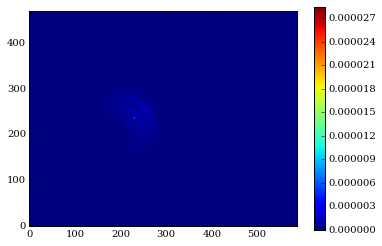

In [79]:
plt.imshow( image.data, origin='lower' )
plt.colorbar()

In [80]:
print "Value Range: ",image.data.min(), image.data.max()

Value Range:  0.0 2.84462517894e-05


Let's scale the plot nicer by taking the SQRT and changing the min/max values

<matplotlib.colorbar.Colorbar instance at 0x10eee52d8>

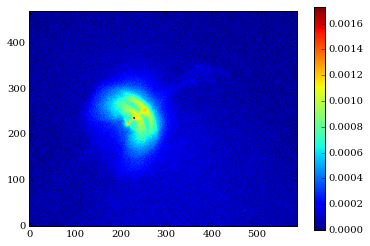

In [81]:
plt.imshow( np.sqrt(image.data), vmin=0, vmax=np.sqrt(0.3e-5), origin='lower' )
plt.colorbar()

In [82]:
clip = image.data[100:300,100:300]


####Basic Image Smoothing

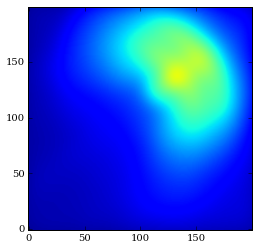

In [83]:
from astropy import convolution as conv
from astropy import visualization as vis
from astropy.visualization.mpl_normalize import ImageNormalize

# gaussian-smooth the image with a std of 8.0 pixelsl
gauss = conv.Gaussian2DKernel( 8.0 )
smooth = conv.convolve_fft( clip, gauss ) 
plt.imshow( np.sqrt(smooth), vmin=0, vmax=np.sqrt(0.3e-5), origin='lower' )

#### Fancier image scaling/plotting (like DS9)

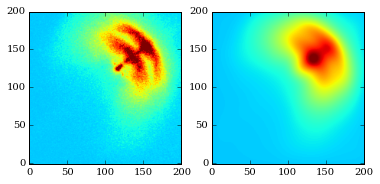

In [84]:
stretch =  vis.ContrastBiasStretch(0.2,0.9)  # there are many other types
interval = vis.PercentileInterval(95.0)   # many other types too

limits = interval.get_limits( image.data )
norm = ImageNormalize( vmin=limits[0], vmax=limits[1], 
                        stretch=stretch, clip=False )

fig, ax = plt.subplots(1,2)
im1 = ax[0].imshow( clip, norm=norm, origin='lower' )
im2 = ax[1].imshow( smooth, norm=norm, origin='lower' )

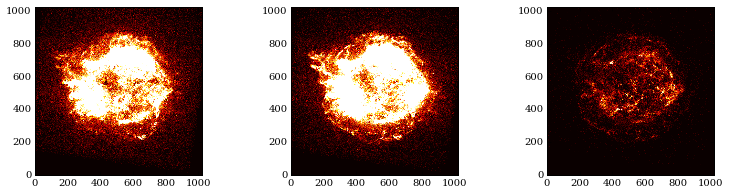

In [85]:
R = fits.open( "casa_0.5-1.5keV.fits" )[0].data 
G = fits.open( "casa_1.5-3.0keV.fits" )[0].data
B = fits.open( "casa_4.0-6.0keV.fits" )[0].data

plt.hot()
plt.figure( figsize=(13,3) )
plt.subplot( 1,3,1 )
plt.imshow( R, origin='lower', vmax=10 )
plt.subplot( 1,3,2 )
plt.imshow( G, origin='lower', vmax=10)
plt.subplot( 1,3,3 )
plt.imshow( B, origin='lower',vmax=10 )


In [86]:
stacked = np.array( (R/R.max(),G/G.max(),B/B.max()) ).T 
print stacked.shape

(1024, 1024, 3)


**note:**
  - we took the Transpose to make it 1024 x 1024 x 3 , rather than 3 x 1024 x 1024
  - we did some division since RGB images must be in the range (0,1) for each plane 
  
Now, let's plot it! **imshow** understands RGB images if they are a NxMx3 NDArray

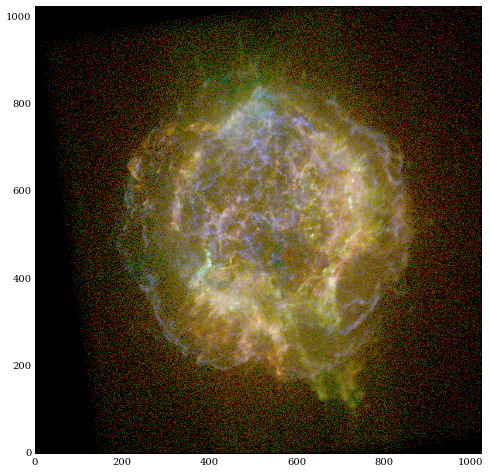

In [87]:
plt.figure( figsize=(8,8))
plt.imshow( stacked**0.2, origin='lower' )


Ok, it's not beautiful yet, but you can see what can be done.  To make the plot nicer, you would want to:
* resample the data with SciPy,
* smoooth and normalize the data
* use a plotting system that understands astronomical projections like:
    * Kapteyn (http://www.astro.rug.nl/software/kapteyn/)
    * AplPy (http://aplpy.github.io)
    * 

## Advanced topics, not covered here

### Modelling
* define spectral and spatial models
* combine models, tie or restrict parameters
* fit them to data

### Cosmology
* basic functions to compute cosmological quantities given an input cosmology

### NDData 
* fancier data cubes with errors and WCS info

### Projection and Deprojection (WCS: World Coordinate System)
``astropy.wcs`` for examples of how to transform between **pixel coordinates** and **sky coordinates**, based on FITS header information.    

### Virtual Observatory Access

--------------------------------------------------

# BREAKOUT

Tell me which of the objects in the Fermi 3FGL catalog with flux above:  $$2.0\times10^{10}\;\mathrm{TeV cm^{-2} s^{-1}}$$ will be visible in the sky tonight above 10 deg elevation at midnight UTC.  Print the results into an HTML table.

>The Fermi 3FGL Catalog FITS file is already in this directory, and is called: <a href="gll_psc_v14.fit"> gll_psc_v14.fit </a>

